In [111]:
!pip install pandas
import pandas as pd

data = pd.read_csv('./StudentPerformanceFactors.csv')

In [112]:
print(data.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


Έχουμε 19 χαρακτηριστικά και προσπαθούμε να προβλέψουμε την τιμή του Exam_Score.

In [113]:
num_rows = data.shape[0]
num_char = data.shape[1]
print(num_rows)
print(num_char)

6607
20


In [114]:
print(data.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Παρατηρούμε πως τα attributes Teacher_quality, Parental_Education_Level και Distance_from_Home έχουν missing values. Τα μοντέλα μηχανικής μάθησης δεν μπορούν να διαχειριστούν δεδομένα με ελλιπείς τιμές. Για να αντιμετωπίσουμε το συγκεκριμένο πρόβλημα μπορούμε να αφαιρέσουμε τις συγκεκριμένες παρατηρήσεις αφού όπως μπορούμε να δούμε είναι πολύ λίγες και οι παρατηρήσεις μας πολλές. Το πλήθος των γραμμών στις οποίες υπάρχουν ελλειπέις τιμες είναι μικρότερο απο το 10% των συνολικών γραμμών.

In [115]:
data.dropna(inplace=True)

In [116]:
print(data.isna().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Πλέων δεν υπάρχουν ελλειπείς τιμές στις παρατηρήσεις μας. Παρακάτω υπολογιζουμε το νέο μέγεθος του dataframe μετά την διαγραφή των γραμμών που περιείχαν ελλειπείς τιμές.

In [117]:
num_rows = data.shape[0]
num_columns = data.shape[1]

print("Number of Rows: ", num_rows)
print()
print("Number of columns: ", num_columns)

Number of Rows:  6378

Number of columns:  20


In [118]:
print(data.tail())

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603

In [119]:
data.reset_index(drop=True, inplace=True)

Το παραπάνω το κάναμε έτσι ώστε να γίνουν reset τα indexes στο data και να εμφανίζεται σωστά ο αριθμός της κάθε γραμμής.

In [120]:
print(data.tail())

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6373           Medium             Yes                  1          High   
6374

In [121]:
print(data.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


Παρατηρούμε πως κάποια απο τα χαρακτηριστικά είναι κατηγορικά και κάποια άλλα αριθμητικά. Το Physical_Activity παρόλο που αποτελεί αριθμητική μεταβλητή αποτελεί κωδικοποιημένη κατηγορική μεταβλητή, η οποία παίρνει ακαίρεες τιμές απο το 0 μέχρι και το 6. Το 0 συμβοίζει την ελάχιστη φυσική δραστηριότητα και το 6 την μέγιστη. Η μεταβλητή η οποία προσπαθούμε να προβλέψουμε είναι αριθμητική επομένως έχουμε πρόβλημα παλινδρόμισης.

Παρακάτω θα παρουσιάσουμε συγκεκριμένα χαρακτηριστικά των δεδομένων έτσι ώστε να πάρουμε μια καλύτερη εικόνα για αυτά.

In [122]:
data["Physical_Activity"] = data["Physical_Activity"].astype("object") # Αρχικά κάνουμε το Physical_Activity object αφού αποτελεί κατηγορική μεταβλητή.

summary = data.describe()
summary_object = data.describe(include='object')

print("Summary of all numerical attributes: ")
print()
print(summary)
print()
print("Summary of all categorical attributes: ")
print()
print(summary_object)
print(data["Physical_Activity"].tail())

Summary of all numerical attributes: 

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions   Exam_Score  
count        6378.000000  6378.000000  
mean            1.495296    67.252117  
std             1.233984     3.914217  
min             0.000000    55.000000  
25%             1.000000    65.000000  
50%             1.000000    67.000000  
75%             2.000000    69.000000  
max             8.000000   101.000000

In [123]:
numeric_data = data.select_dtypes(include=['number'])
categorical_data = data.select_dtypes(include=['object'])

In [124]:
IQR = summary.loc['75%'] - summary.loc['25%']
evros = summary.loc['max'] - summary.loc['min']
median = numeric_data.median()

print("Range: ")
print()
print(evros)
print()
print("IQR: ")
print()
print(IQR)
print()
print("Median: ")
print()
print(median)

Range: 

Hours_Studied        43.0
Attendance           40.0
Sleep_Hours           6.0
Previous_Scores      50.0
Tutoring_Sessions     8.0
Exam_Score           46.0
dtype: float64

IQR: 

Hours_Studied         8.0
Attendance           20.0
Sleep_Hours           2.0
Previous_Scores      25.0
Tutoring_Sessions     1.0
Exam_Score            4.0
dtype: float64

Median: 

Hours_Studied        20.0
Attendance           80.0
Sleep_Hours           7.0
Previous_Scores      75.0
Tutoring_Sessions     1.0
Exam_Score           67.0
dtype: float64


Παρακάτω παρουσιάζονται οι συσχετίσεις μεταξύ των αριθμητικών μεταβλητών(Pearson table), μεταξύ των κατηγορικών μεταβλητών(Cramer's V) και μεταξύ των αριθμητικών και κατηγορικών(ANOVA).   

<Axes: >

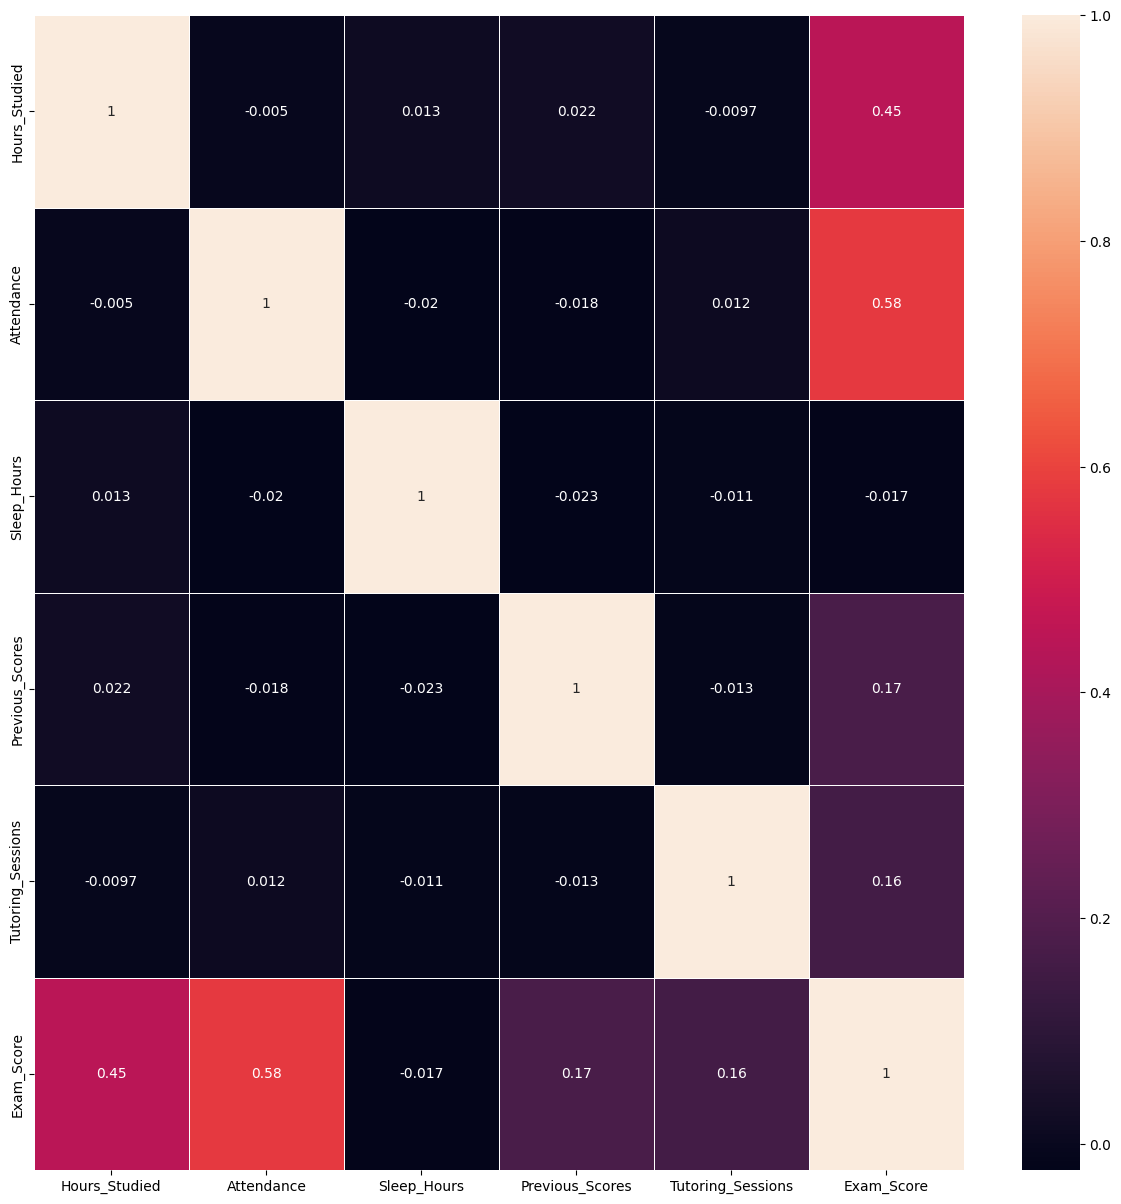

In [125]:
!pip install seaborn
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

corr_matrix = numeric_data.corr()

fig, ax = plt.subplots(figsize=(15,15))       
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

<Axes: >

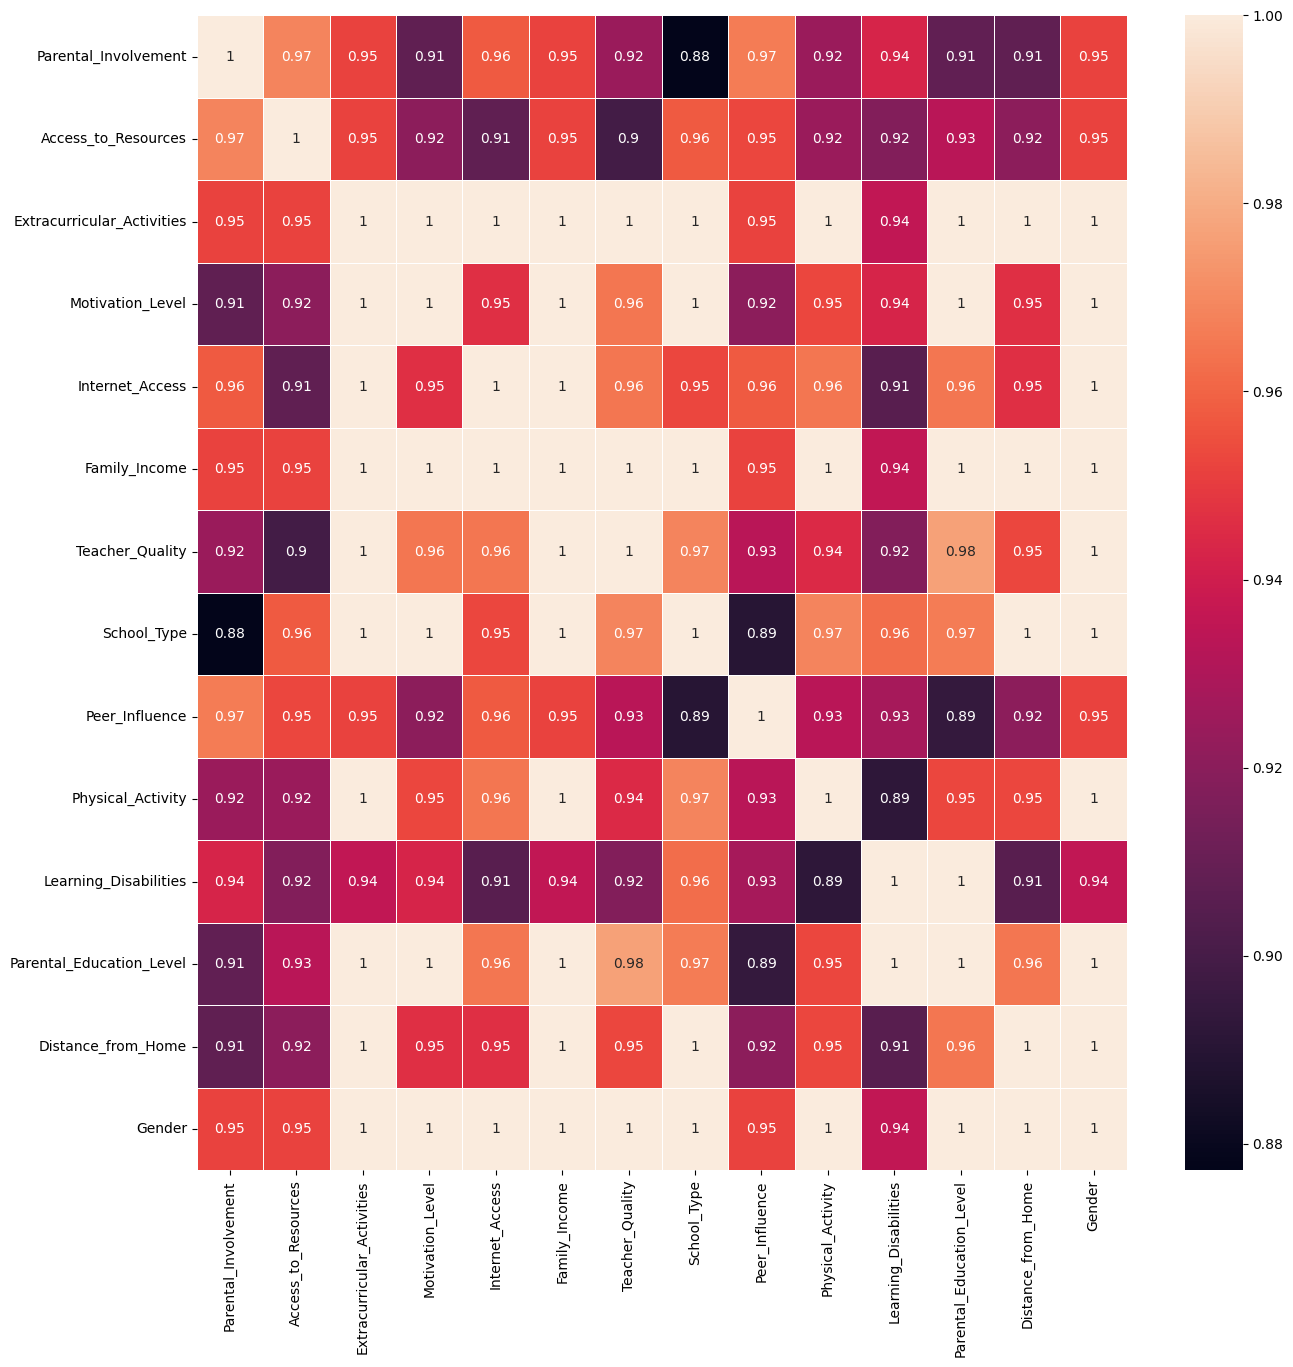

In [126]:
!pip install scipy
!pip install numpy

from scipy.stats import chi2_contingency
import numpy as np
categorical_attributes = categorical_data.columns

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  
    r, k = contingency_table.shape     
    cramers_v_value = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    return cramers_v_value



fig, ax = plt.subplots(figsize=(15,15))       

df = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

for i in range(categorical_data.shape[1]):
    for j in range(categorical_data.shape[1]):
        df.iloc[i,j] = cramers_v(categorical_data.iloc[i], categorical_data.iloc[j])
        
df = df.astype(float)
sn.heatmap(df, annot=True,linewidths=.5, ax=ax)

<Axes: >

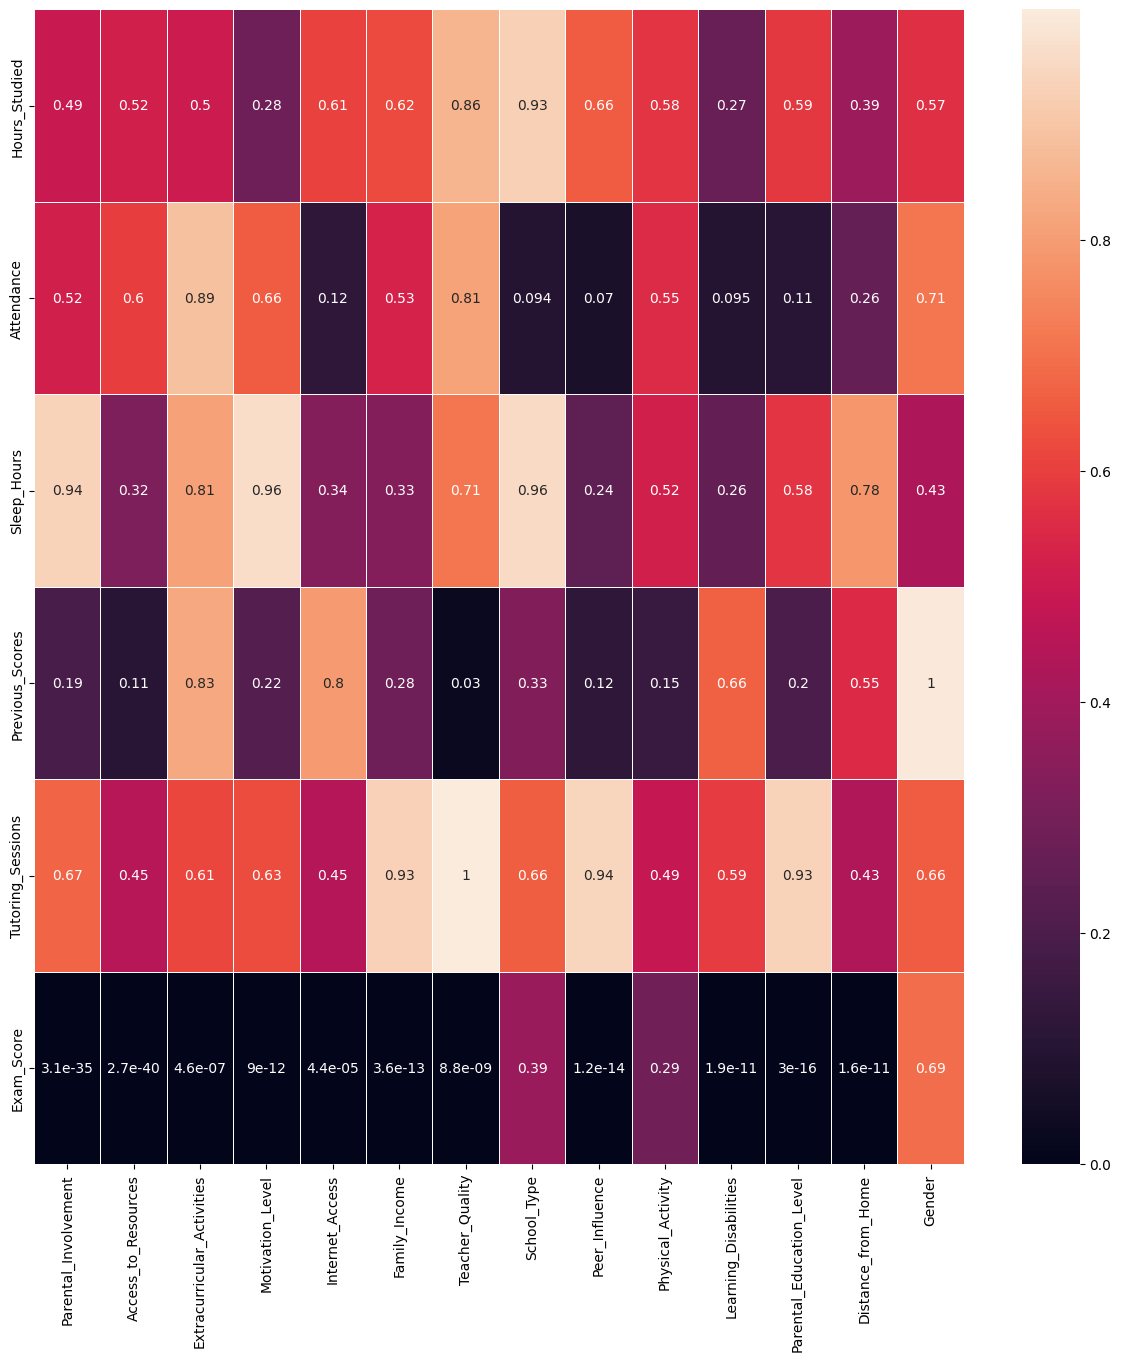

In [127]:
from scipy.stats import f_oneway

numeric_attributes = numeric_data.columns
df = pd.DataFrame(index=numeric_attributes, columns=categorical_attributes)

def anova_test(x, y):
    categories = y.unique()
    grouped_data = [x[y==cat] for cat in categories]
    f_stat, p_value = f_oneway(*grouped_data)
    return p_value

fig, ax = plt.subplots(figsize=(15,15))

for i in range(len(numeric_attributes)):
    for j in range(categorical_data.shape[1]):
        df.iloc[i,j] = anova_test(numeric_data.iloc[:,i],categorical_data.iloc[:,j])

df = df.astype(float)
sn.heatmap(df, annot=True,linewidths=.5, ax=ax)

Παρακάτω δίνονται τα ιστογράμματα και τα boxplots όλων των αριθμητικών χαρακτηριστικών.

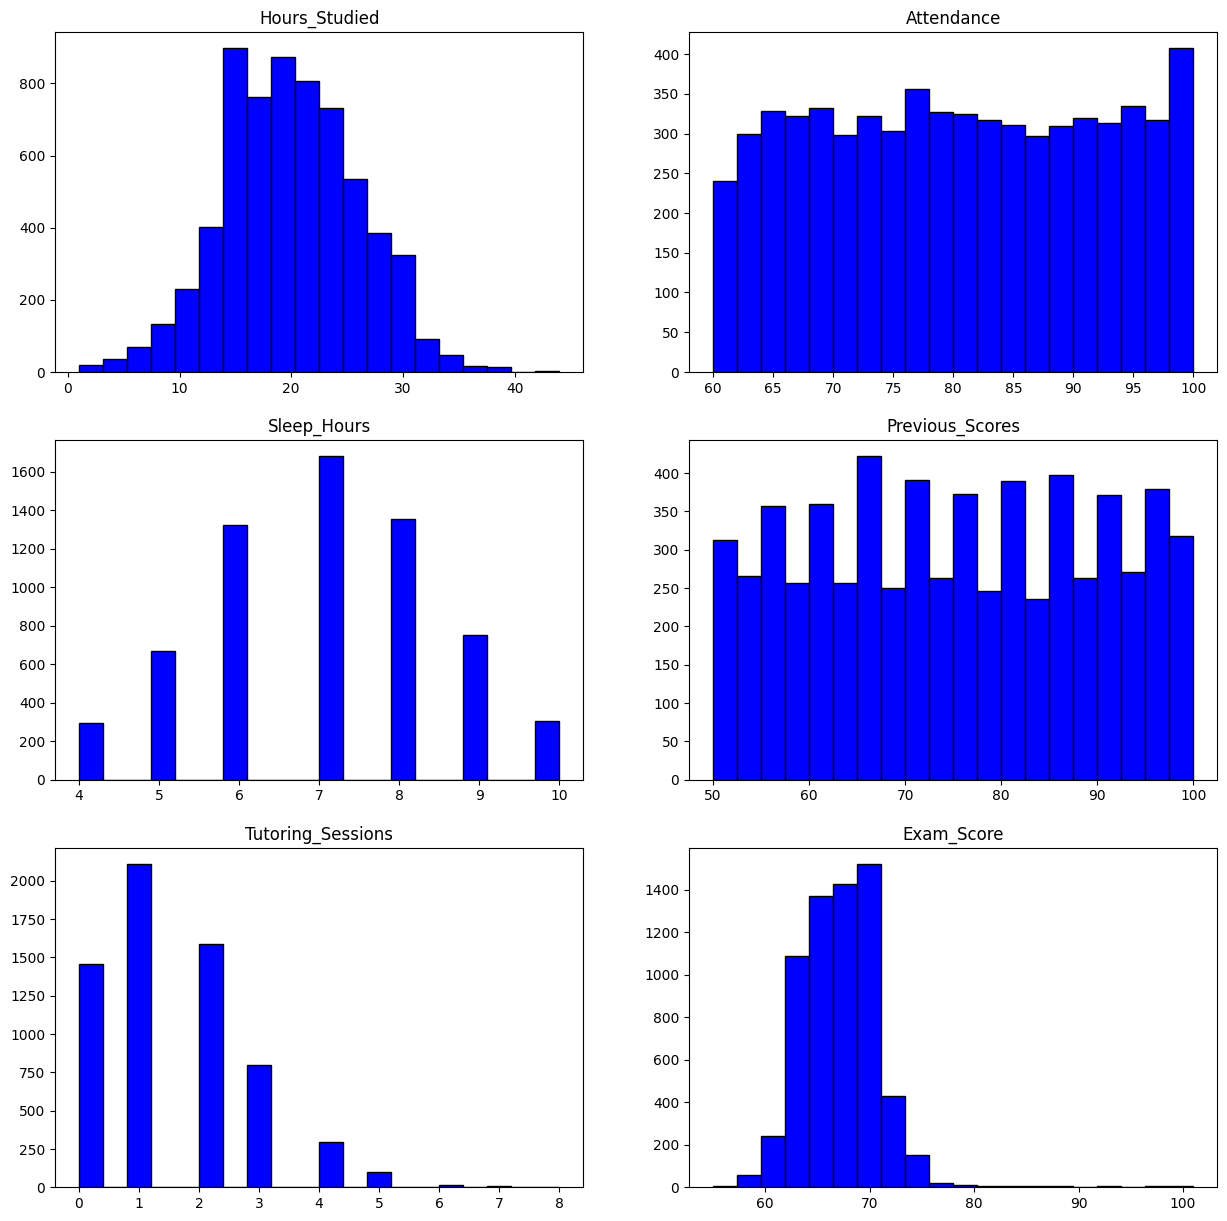

In [128]:
fig ,ax = plt.subplots(figsize=(15,15), nrows=3, ncols=2)

for i in range(len(numeric_attributes)):
    ax[i//2,i%2].hist(numeric_data.iloc[:,i], bins=20, color='blue', edgecolor='black')
    ax[i//2,i%2].set_title(numeric_attributes[i])

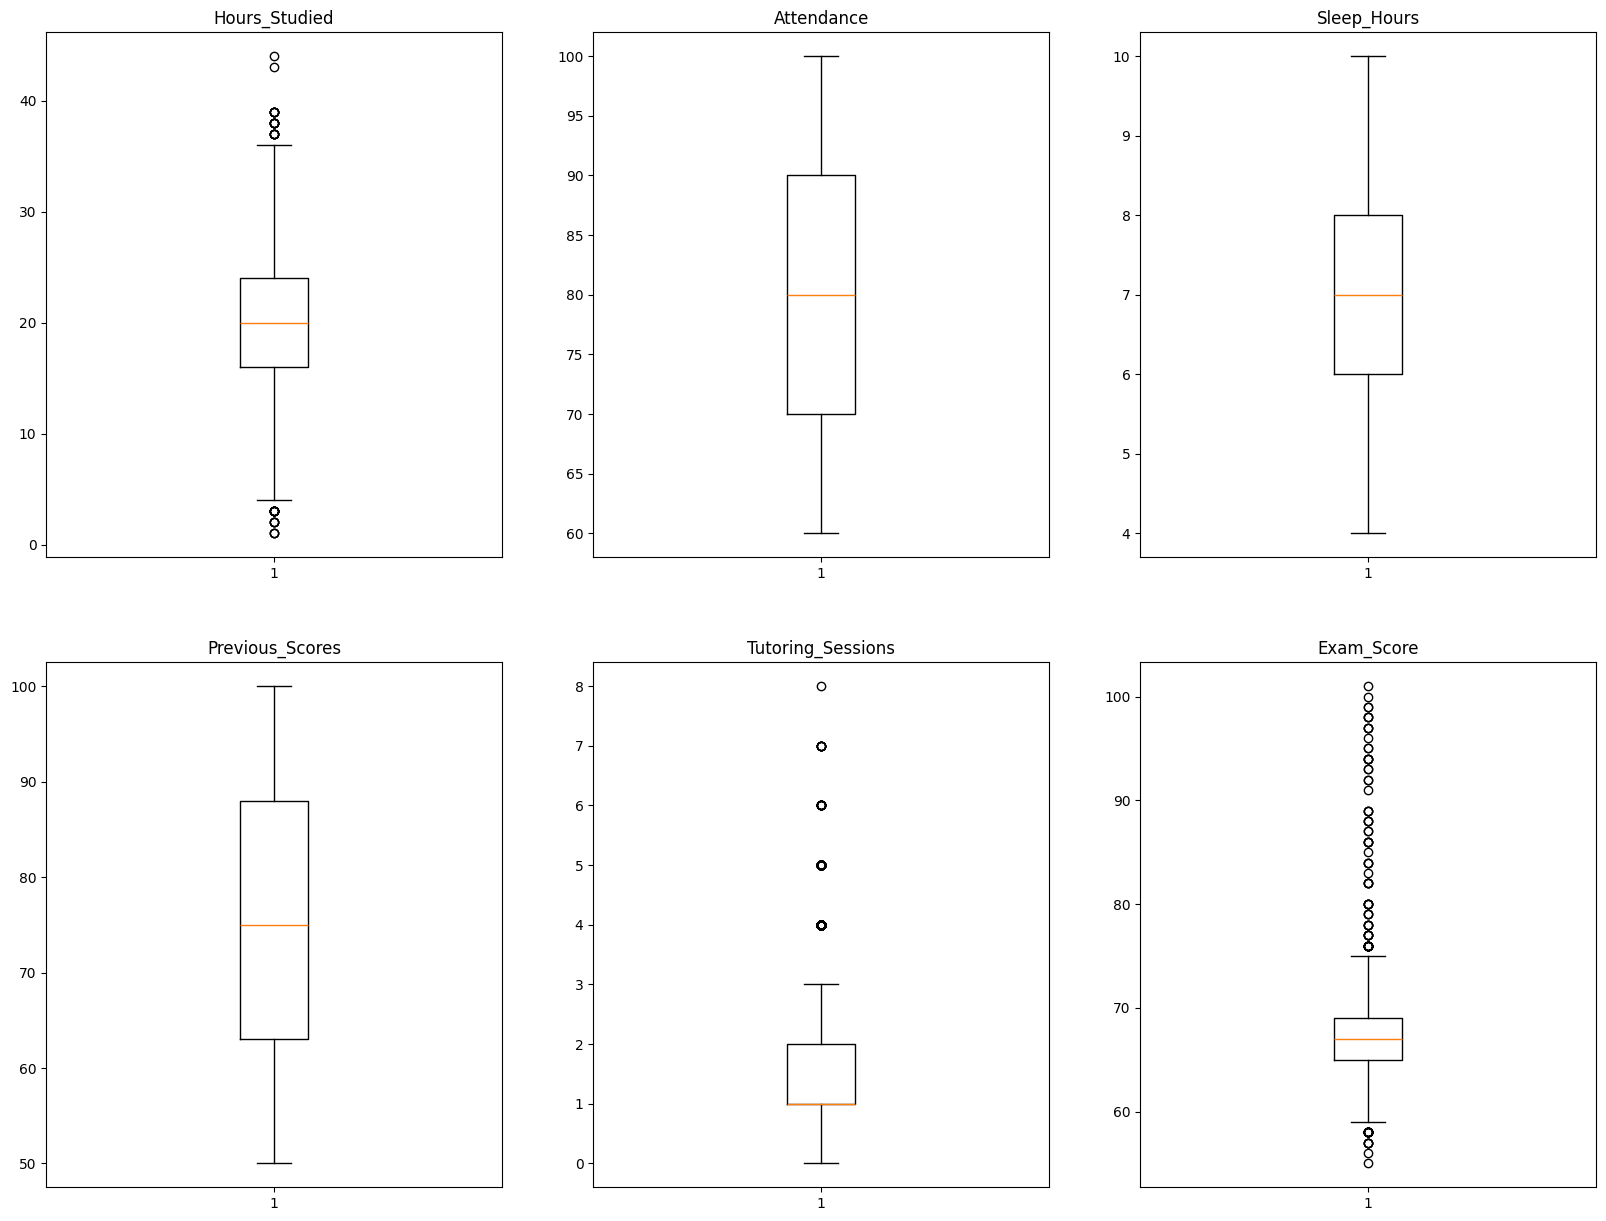

In [129]:
fig ,ax = plt.subplots(figsize=(20,15), nrows=2, ncols=3)

for i in range(len(numeric_attributes)):
    ax[i//3,i%3].boxplot(numeric_data.iloc[:,i])
    ax[i//3,i%3].set_title(numeric_attributes[i])

Στη συνέχεια για κάθε κατηγορική μεταβλητή δημιουργούμε ένα barplot για να δούμε το πλήθος κάθε κατηγορίας σε κάθε χαρακτηριστικό.

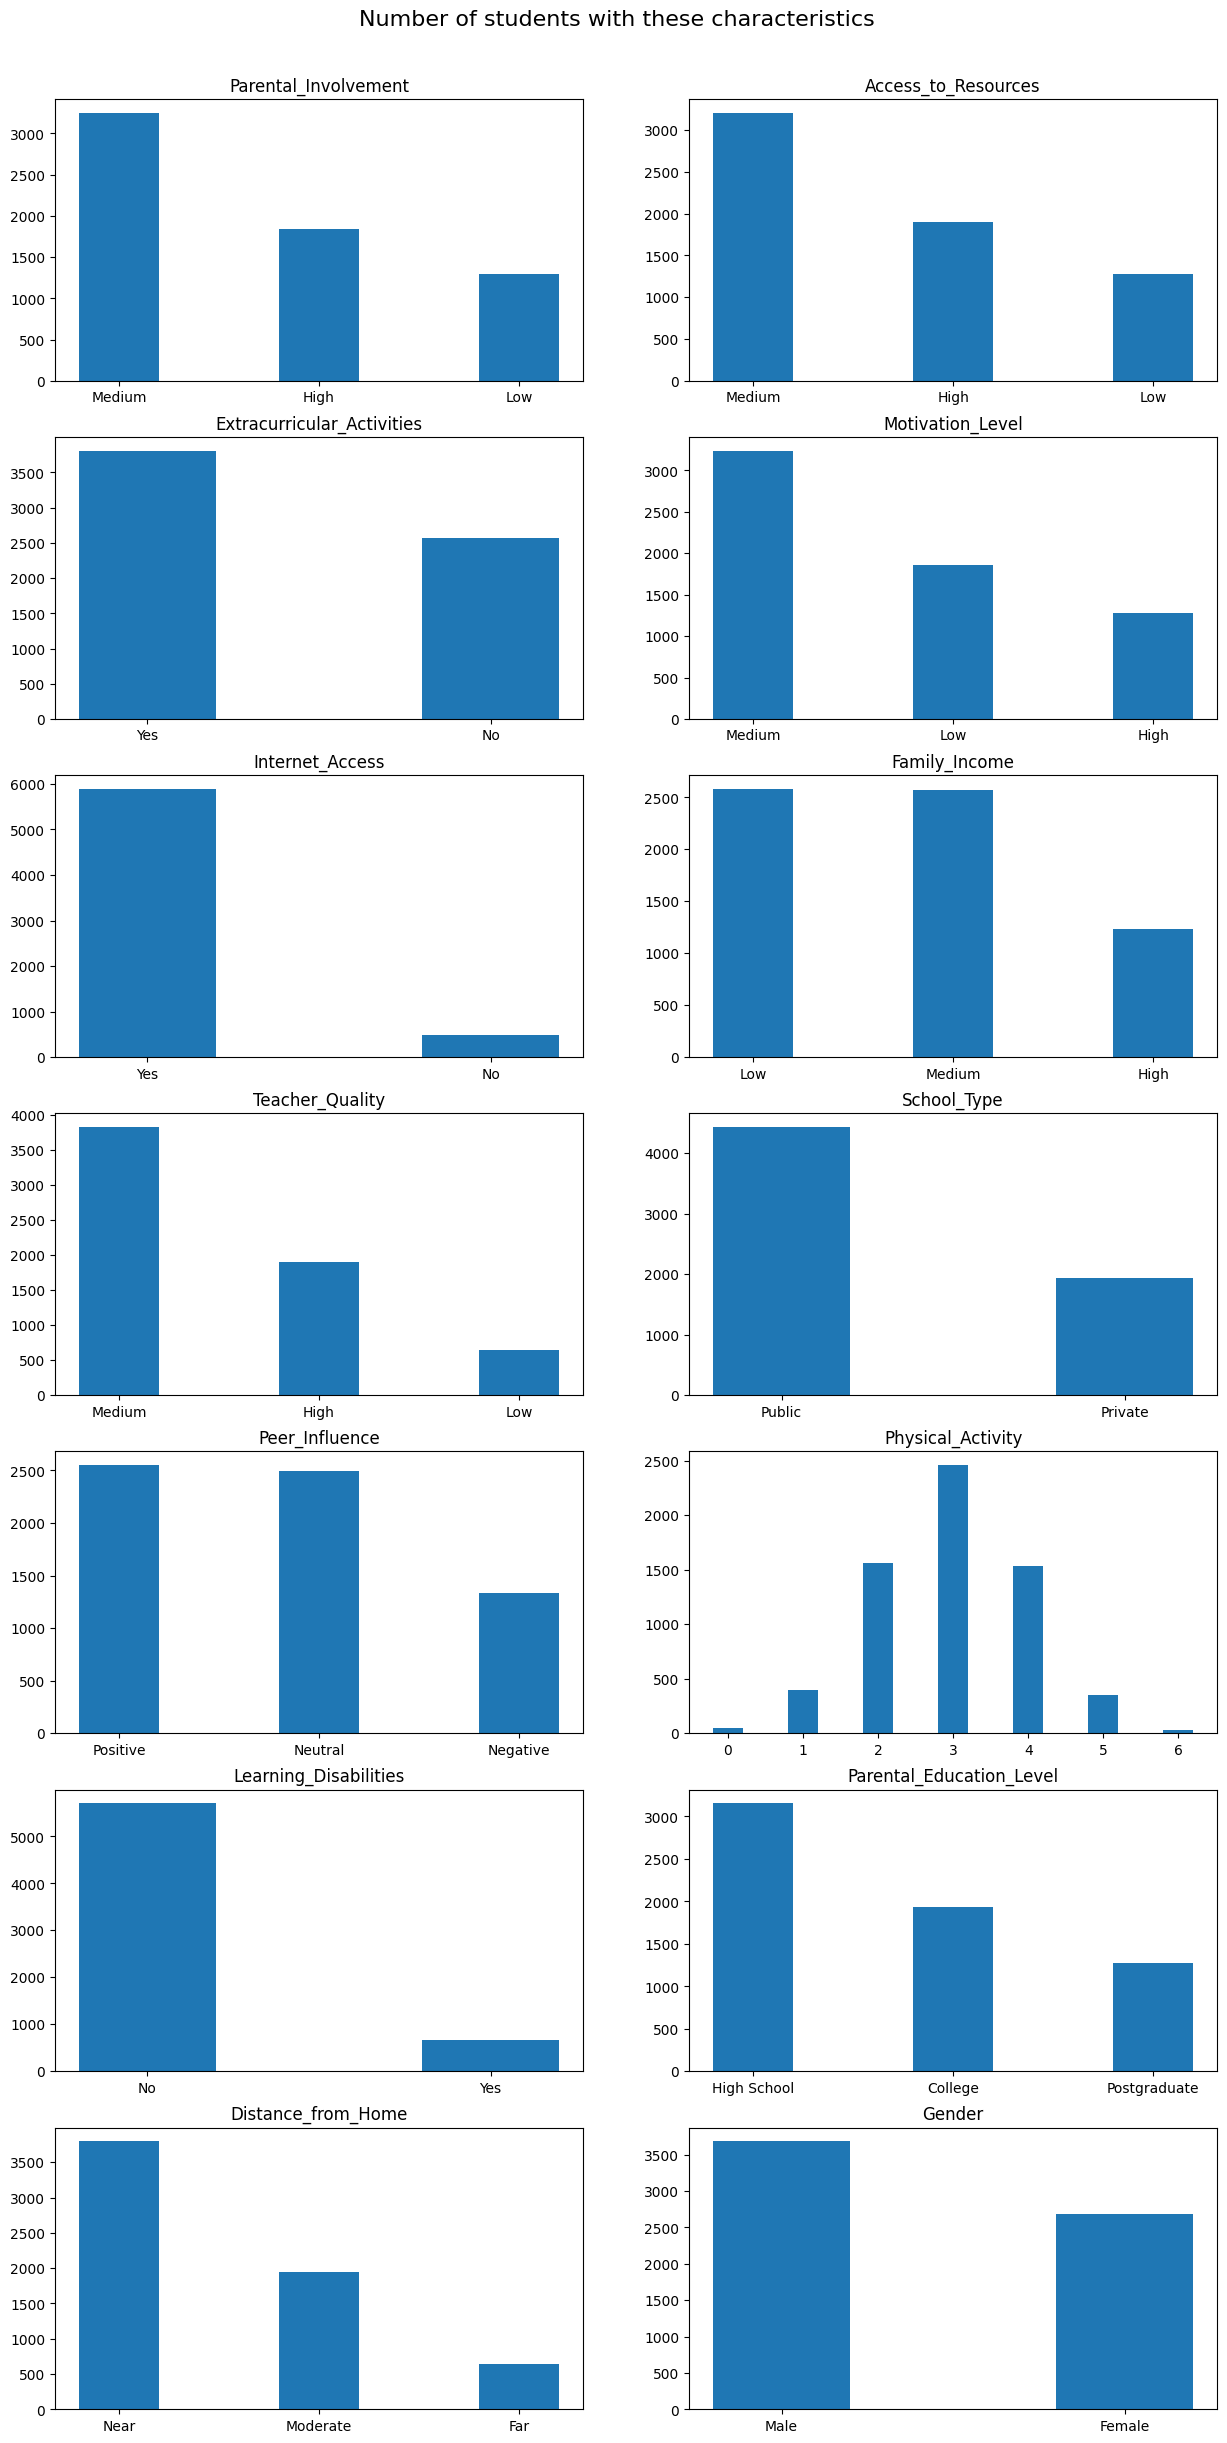

In [130]:
fig ,ax = plt.subplots(figsize=(15,30), nrows=7, ncols=2)

fig.suptitle("Number of students with these characteristics", fontsize=16, y=0.91)

for i in range(len(categorical_attributes)):
    ax[i//2,i%2].bar(categorical_data[categorical_attributes[i]].value_counts().index, categorical_data[categorical_attributes[i]].value_counts(),width=0.4)
    ax[i//2,i%2].set_title(categorical_attributes[i])

Γνωρίζουμε πως τα μοντέλα μηχανικής μάθησης δεν μπορούν να διαχειριστούν μη-αριθμητικά δεδομένα. Επομένως, μέσω των encoders θα τα μετατρέψουμε με κατάλληλο τρόπο σε αριθμητικά χωρίς όμως να αλλάζουμε την ιδιότητα τους πως αποτελούν κατηγορίες. Θα χρησιμοποιήσουμε Ordinal encoder για τα χαρακτηριστικά τα οποία περιέχουν κατηγορίες, οι οποίες έχουν κάποια φυσική σειρά(π.χ. "Low","Medium","High") και OneHot encoder για τα χαρακτηριστικά τα οποία περιέχουν κατηγορίες, οι οποίες δεν έχουν κάποια φυσική σειρά(π.χ. "Yes","No").

Όταν χρησιμοποιούμε αλγόριθμους μηχανικής μάθησης οι οποίοι περιέχουν αποστάσεις(π.χ. K-Neighbors Classifier, K-means, linear regression, polynomial regression etc.) πρέπει να κάνουμε κάποια κλιμάκωση στα δεδομένα μας. Αυτό γίνετε γιατί έτσι ώστε τα χαρακτηριστικά τα οποία έχουν μεγάλο εύρος να μην υπερισχύσουν σε αυτά τα οποία δεν έχουν μεγάλο εύρος με αποτέλεσμα να προσθεθούν σφάλματα στο μοντέλο μας.Ιδανικά θέλουμε όλα τα αριθμητικά χαρακτηριστικά να έχουν την ίδια κλίμακα. Η κλιμάκωση δεν εφαρμόζεται στα κωδικοποιημένα κατηγορικά χαρακτηριστικά επειδή δεν έχει κανένα νόημα, ούτε και στην μεταβλητή η οποία προσπαθούμε να προβλέψουμε για τον ίδιο λόγο με πρίν. Μπορούμε να παρατηρήσουμε μέσω των ιστογραμμάτων που δημιουργήσαμε παραπάνω πως η μεταβλητή Hours_Studied ακολουθεί προσεγγιστικά κανονική κατανομή(Δεν μπορούμε να το πούμε στην πραγματικότητα επειδή οι τιμές είναι ακέραιοι αριθμοί αλλά αυτό δεν μας επιρεάζει.) για αυτό και θα χρησιμοποιήσουμε standarization μέσω του StandardScaler. Το ίδιο για το Sleep_Hours. Για τις μεταβλητές Previous_Scores, Attedance μπορούμε να δούμε πως είναι κατανεμημένα προσεγγιστικά ομοιόμορφα σε ένα θετικό διάστημα(θεωρώντας πως παίρνει μόνο ακέραιες τιμές). Για αυτό θα χρησιμοποιήσουμε τον MinMaxScaler έτσι ώστε να τις κάνουμε compress σε ένα αρκετά μικρότερο εύρος. Τέλος, παρατηρούμε πως η μεταβλητή Tutoring_Sessions έχει μεγαλύτερη ουρά στα δεξιά επομένως θα χρησιμοποιήσουμε Robust Standarization.

In [131]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler

ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["High School","College","Postgraduate"],["Near","Moderate","Far"],[0,1,2,3,4,5,6]])
OneHot_encoder = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [132]:
!pip install numpy
from sklearn.compose import ColumnTransformer
import numpy as np

categorical_ordinal_attributes = data[["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Parental_Education_Level", "Distance_from_Home","Physical_Activity"]].columns.tolist()
categorical_onehot_attributes = data.drop(columns=categorical_ordinal_attributes + numeric_attributes.tolist(),axis =1).columns.tolist()
print(categorical_onehot_attributes)
std_numeric_attributes = ["Hours_Studied", "Sleep_Hours"]
mm_numeric_attributes = ["Attendance","Previous_Scores"]
r_numeric_attributes = ["Tutoring_Sessions"]

preprocessor = ColumnTransformer( 
    transformers=[
        ('minmax_scaler',mm_scaler,mm_numeric_attributes),
        ('robust_scaler',r_scaler,r_numeric_attributes),
        ('passthrough', 'passthrough', ["Exam_Score"]),
        ('std_scaler', std_scaler, std_numeric_attributes),
        ('ordinal', ordinal_encoder, categorical_ordinal_attributes)
        ,('onehot', OneHot_encoder, categorical_onehot_attributes)])

X_transformed = preprocessor.fit_transform(data)

categorical_onehot_attributes = preprocessor.transformers_[5][1].get_feature_names_out(categorical_onehot_attributes)
all_columns = list(mm_numeric_attributes)+ list(r_numeric_attributes)+ list(["Exam_Score"]) + list(std_numeric_attributes) + list(categorical_ordinal_attributes) + list(categorical_onehot_attributes)

data = pd.DataFrame(X_transformed, columns=all_columns)


['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender']


In [133]:
y = data["Exam_Score"]
X = data.drop("Exam_Score",axis=1)

Χωρίζουμε το dataset σε training και validation set.

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ορίζουμε τα μοντέλα παλινδρόμισης για τα οποία θα εξετάσουμε την λειτουργία τους.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge()
lasso = Lasso(alpha=0.01)
poly_regr = PolynomialFeatures()
lregr = LinearRegression()
tree_regr = DecisionTreeRegressor(random_state=42) 
forest_regr = RandomForestRegressor()
svr = SVR()
GBR = GradientBoostingRegressor()

poly_model = Pipeline([
    ('poly', poly_regr),  
    ('linear', lregr)          
])

In [136]:
models = [ poly_model,lregr , tree_regr, forest_regr , svr, GBR, ridge, lasso]

Στη συνέχεια εφαρμόζουμε Sequential Feature Selection(SFS) με Backward Selection για κάθε ένα απο τα παραπάνω μοντέλα παλινρόμισης και δημιουργούμε τις γραφικές απόδοσης της απόδοσης τους με βάση το Mean Square Error για κάθε αριθμό απο attributes. Χρησιμοποιήσαμε Backward Selection έτσι ώστε να είμαστε σίγουροι πως δεν θα μας ξεφύγει κανένα σημαντικό feature.

In [137]:
!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = [0,0,0,0,0,0,0,0]

for i in range(len(models)):
    sfs[i] = SFS(models[i], # scikit-learn classifier
    k_features=(1, X.shape[1]), # termination point
    forward=False, 
    verbose=2, # logging level (messages printed when running)
    scoring="neg_mean_squared_error", # criterion function
    cv=10) # 10-fold cross validation



Regression Model:  Polynomial Regression




[2024-12-08 00:10:40] Features: 25/1 -- score: -4.54597438589241
[2024-12-08 00:21:31] Features: 24/1 -- score: -4.53994978235959
[2024-12-08 00:29:59] Features: 23/1 -- score: -4.538599193718848
[2024-12-08 00:35:59] Features: 22/1 -- score: -4.537840954305671
[2024-12-08 00:44:19] Features: 21/1 -- score: -4.538536273973846
[2024-12-08 00:50:35] Features: 20/1 -- score: -4.538730361988781
[2024-12-08 00:56:19] Features: 19/1 -- score: -4.5386567646142915
[2024-12-08 01:01:40] Features: 18/1 -- score: -4.538803043932463
[2024-12-08 01:05:49] Features: 17/1 -- score: -4.517691528772259
[2024-12-08 01:09:32] Features: 16/1 -- score: -4.537838413552428
[2024-12-08 01:12:14] Features: 15/1 -- score: -4.561055751379256
[2024-12-08 01:15:16] Features: 14/1 -- score: -4.586759390717587
[2024-12-08 01:16:59] Features: 13/1 -- score: -4.6404457515776985
[2024-12-08 01:18:13] Features: 12/1 -- score: -4.702624084696073
[2024-12-08 01:19:12] Features: 11/1 -- score: -4.773563877386003
[2024-12-

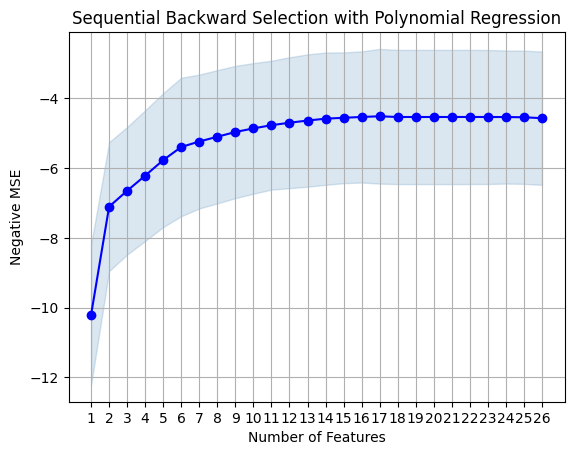

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 19, 21, 23)
MSE: 4.517691528772259

Regression Model:  Linear Regression




[2024-12-08 01:21:20] Features: 25/1 -- score: -4.336740149863895
[2024-12-08 01:21:38] Features: 24/1 -- score: -4.337347618275252
[2024-12-08 01:21:55] Features: 23/1 -- score: -4.33647573598868
[2024-12-08 01:22:10] Features: 22/1 -- score: -4.335947725970996
[2024-12-08 01:22:24] Features: 21/1 -- score: -4.336079376863742
[2024-12-08 01:22:37] Features: 20/1 -- score: -4.335961008451285
[2024-12-08 01:22:48] Features: 19/1 -- score: -4.336181886447621
[2024-12-08 01:22:58] Features: 18/1 -- score: -4.336181886447621
[2024-12-08 01:23:09] Features: 17/1 -- score: -4.3343657687320185
[2024-12-08 01:23:17] Features: 16/1 -- score: -4.37377712682204
[2024-12-08 01:23:23] Features: 15/1 -- score: -4.415296123957347
[2024-12-08 01:23:28] Features: 14/1 -- score: -4.466289731089797
[2024-12-08 01:23:33] Features: 13/1 -- score: -4.532983597689752
[2024-12-08 01:23:37] Features: 12/1 -- score: -4.613596226892258
[2024-12-08 01:23:40] Features: 11/1 -- score: -4.702283331624534
[2024-12-0

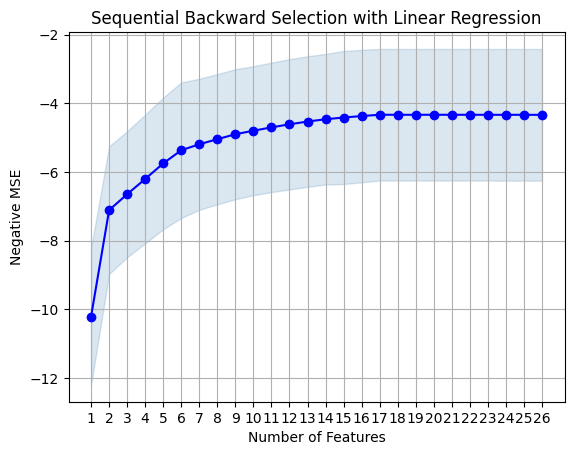

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 19, 21, 23)
MSE: 4.3343657687320185

Regression Model:  Decision Tree Regressor




[2024-12-08 01:24:00] Features: 25/1 -- score: -12.663285368942097
[2024-12-08 01:24:11] Features: 24/1 -- score: -12.016394996354705
[2024-12-08 01:24:21] Features: 23/1 -- score: -12.563409692644182
[2024-12-08 01:24:30] Features: 22/1 -- score: -11.801497640151952
[2024-12-08 01:24:38] Features: 21/1 -- score: -11.568595602624612
[2024-12-08 01:24:46] Features: 20/1 -- score: -11.501318061471164
[2024-12-08 01:24:54] Features: 19/1 -- score: -11.576776025478685
[2024-12-08 01:25:00] Features: 18/1 -- score: -11.676576493611142
[2024-12-08 01:25:07] Features: 17/1 -- score: -11.855239246383483
[2024-12-08 01:25:13] Features: 16/1 -- score: -11.89443996776793
[2024-12-08 01:25:18] Features: 15/1 -- score: -11.614075822109665
[2024-12-08 01:25:22] Features: 14/1 -- score: -12.056687003568552
[2024-12-08 01:25:27] Features: 13/1 -- score: -12.72962204059706
[2024-12-08 01:25:31] Features: 12/1 -- score: -12.404277656267988
[2024-12-08 01:25:34] Features: 11/1 -- score: -12.387234565058

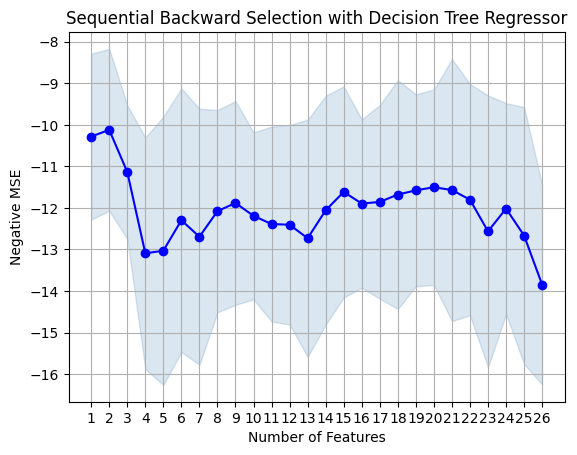

Selected features: (0, 5)
MSE: 10.120028860319591

Regression Model:  Random Forest Regressor




[2024-12-08 01:40:00] Features: 25/1 -- score: -5.666421347262192
[2024-12-08 01:51:35] Features: 24/1 -- score: -5.6424168666206205
[2024-12-08 02:02:45] Features: 23/1 -- score: -5.685310569586738
[2024-12-08 02:12:38] Features: 22/1 -- score: -5.735248023598481
[2024-12-08 02:22:28] Features: 21/1 -- score: -5.697888609339627
[2024-12-08 02:33:38] Features: 20/1 -- score: -5.706970888185412
[2024-12-08 02:44:16] Features: 19/1 -- score: -5.678307174168298
[2024-12-08 02:53:39] Features: 18/1 -- score: -5.717211059552588
[2024-12-08 03:02:10] Features: 17/1 -- score: -5.713211344384328
[2024-12-08 03:10:21] Features: 16/1 -- score: -5.733502454088485
[2024-12-08 03:17:36] Features: 15/1 -- score: -5.766609717931007
[2024-12-08 03:24:06] Features: 14/1 -- score: -5.793624043283067
[2024-12-08 03:29:34] Features: 13/1 -- score: -5.757309809485437
[2024-12-08 03:33:12] Features: 12/1 -- score: -5.792160396070757
[2024-12-08 03:36:40] Features: 11/1 -- score: -5.7962670676873485
[2024-1

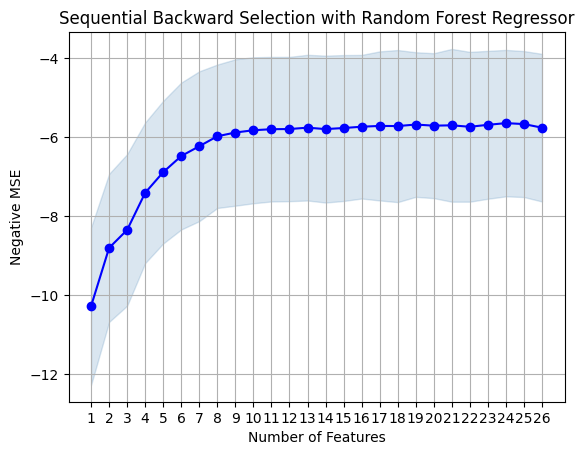

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25)
MSE: 5.6424168666206205

Regression Model:  Support Vector Regressor




[2024-12-08 03:58:14] Features: 25/1 -- score: -4.5112667781408975
[2024-12-08 10:26:53] Features: 24/1 -- score: -4.5095757647829435
[2024-12-08 10:33:11] Features: 23/1 -- score: -4.508027696579593
[2024-12-08 10:39:08] Features: 22/1 -- score: -4.507046970621885
[2024-12-08 10:44:38] Features: 21/1 -- score: -4.506030283003441
[2024-12-08 10:49:49] Features: 20/1 -- score: -4.507070844614421
[2024-12-08 10:54:44] Features: 19/1 -- score: -4.507546468020537
[2024-12-08 10:59:19] Features: 18/1 -- score: -4.50808884019762
[2024-12-08 11:03:38] Features: 17/1 -- score: -4.508380715633397
[2024-12-08 11:07:39] Features: 16/1 -- score: -4.555986774757924
[2024-12-08 11:11:13] Features: 15/1 -- score: -4.621964499343717
[2024-12-08 11:14:28] Features: 14/1 -- score: -4.69869640565064
[2024-12-08 11:17:34] Features: 13/1 -- score: -4.7817763685703065
[2024-12-08 11:20:26] Features: 12/1 -- score: -4.88685904518101
[2024-12-08 11:23:35] Features: 11/1 -- score: -4.989039779401218
[2024-12-

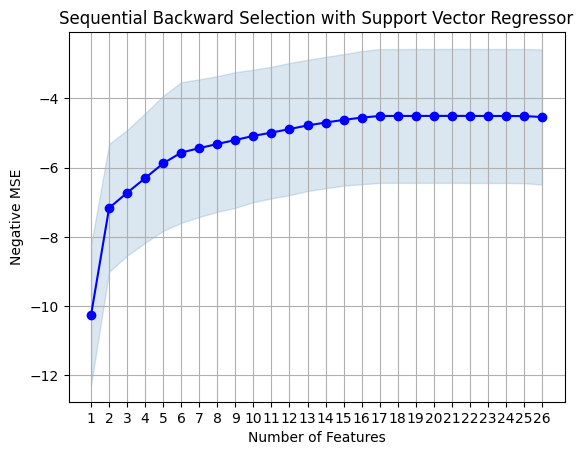

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23)
MSE: 4.506030283003441

Regression Model:  Gradient Boosting Regressor




[2024-12-08 11:46:51] Features: 25/1 -- score: -4.922926495895138
[2024-12-08 11:50:21] Features: 24/1 -- score: -4.918205597562523
[2024-12-08 11:53:29] Features: 23/1 -- score: -4.918205597562523
[2024-12-08 11:56:22] Features: 22/1 -- score: -4.918205597562523
[2024-12-08 11:58:57] Features: 21/1 -- score: -4.916944003335277
[2024-12-08 12:01:26] Features: 20/1 -- score: -4.916944003335276
[2024-12-08 12:03:56] Features: 19/1 -- score: -4.916944003335276
[2024-12-08 12:06:21] Features: 18/1 -- score: -4.916944003335276
[2024-12-08 12:08:33] Features: 17/1 -- score: -4.916944003335277
[2024-12-08 12:10:34] Features: 16/1 -- score: -4.911626886346673
[2024-12-08 12:12:21] Features: 15/1 -- score: -4.947610175911219
[2024-12-08 12:13:58] Features: 14/1 -- score: -4.971099513549345
[2024-12-08 12:15:25] Features: 13/1 -- score: -5.010751217179839
[2024-12-08 12:16:50] Features: 12/1 -- score: -5.062762388060113
[2024-12-08 12:18:02] Features: 11/1 -- score: -5.130504454019986
[2024-12-

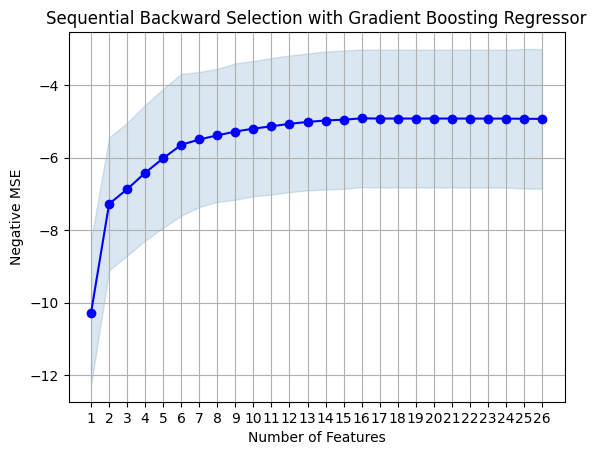

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 16, 19, 21, 22)
MSE: 4.911626886346673

Regression Model:  Ridge Regression




[2024-12-08 12:23:27] Features: 25/1 -- score: -4.337034308006185
[2024-12-08 12:23:29] Features: 24/1 -- score: -4.337029845527215
[2024-12-08 12:23:31] Features: 23/1 -- score: -4.337026407039405
[2024-12-08 12:23:33] Features: 22/1 -- score: -4.337025125503893
[2024-12-08 12:23:35] Features: 21/1 -- score: -4.337023848196418
[2024-12-08 12:23:36] Features: 20/1 -- score: -4.33522727297502
[2024-12-08 12:23:37] Features: 19/1 -- score: -4.335226858377551
[2024-12-08 12:23:39] Features: 18/1 -- score: -4.3343750172001005
[2024-12-08 12:23:40] Features: 17/1 -- score: -4.33437517932921
[2024-12-08 12:23:41] Features: 16/1 -- score: -4.373795376777388
[2024-12-08 12:23:42] Features: 15/1 -- score: -4.415317325468051
[2024-12-08 12:23:43] Features: 14/1 -- score: -4.466311030210777
[2024-12-08 12:23:44] Features: 13/1 -- score: -4.533017443596302
[2024-12-08 12:23:45] Features: 12/1 -- score: -4.613625055035104
[2024-12-08 12:23:45] Features: 11/1 -- score: -4.702310824122428
[2024-12-0

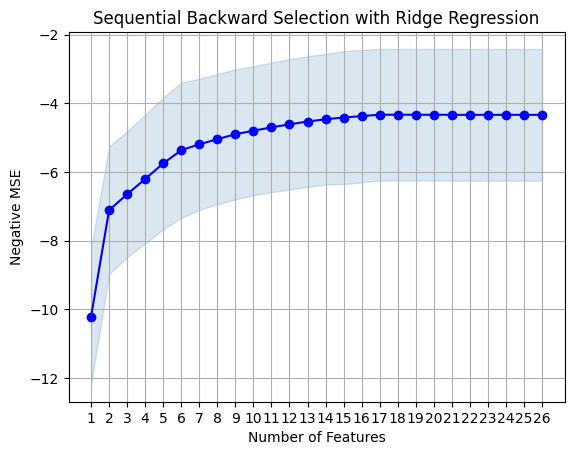

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 21, 22)
MSE: 4.3343750172001005

Regression Model:  Lasso Regression




[2024-12-08 12:23:52] Features: 25/1 -- score: -4.343653422875492
[2024-12-08 12:23:54] Features: 24/1 -- score: -4.34365342287549
[2024-12-08 12:23:56] Features: 23/1 -- score: -4.34365342287549
[2024-12-08 12:23:58] Features: 22/1 -- score: -4.34365342287549
[2024-12-08 12:24:00] Features: 21/1 -- score: -4.34365342287549
[2024-12-08 12:24:02] Features: 20/1 -- score: -4.34365342287549
[2024-12-08 12:24:03] Features: 19/1 -- score: -4.3427606551012605
[2024-12-08 12:24:05] Features: 18/1 -- score: -4.3427606551012605
[2024-12-08 12:24:06] Features: 17/1 -- score: -4.342762283324786
[2024-12-08 12:24:07] Features: 16/1 -- score: -4.382143434435362
[2024-12-08 12:24:08] Features: 15/1 -- score: -4.4235467686003185
[2024-12-08 12:24:09] Features: 14/1 -- score: -4.472641775116983
[2024-12-08 12:24:10] Features: 13/1 -- score: -4.538431345124499
[2024-12-08 12:24:11] Features: 12/1 -- score: -4.618459889366303
[2024-12-08 12:24:12] Features: 11/1 -- score: -4.706982111481033
[2024-12-08

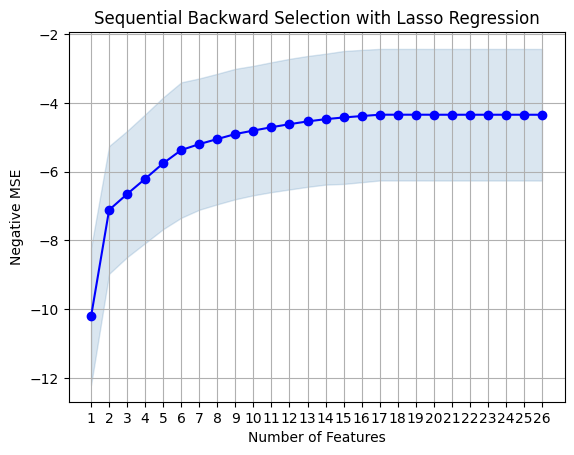

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22)
MSE: 4.3427606551012605



In [138]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

model = ["Polynomial Regression","Linear Regression","Decision Tree Regressor","Random Forest Regressor","Support Vector Regressor","Gradient Boosting Regressor","Ridge Regression","Lasso Regression"]

for i in range(len(models)):
    print("Regression Model: ", model[i])
    print()
    sfs[i] = sfs[i].fit(X_train, y_train)
    plot_sfs(sfs[i].get_metric_dict(), kind='std_dev')
    plt.title('Sequential Backward Selection with ' + model[i])
    plt.grid()
    plt.ylabel("Negative MSE")
    plt.show()
    print('Selected features:', sfs[i].k_feature_idx_)
    print('MSE:', -sfs[i].k_score_)
    print()


Τώρα για κάθε μέθοδο θα πάρουμε το αντίστοιχο dataset.

In [139]:
X_train_models, X_test_models = [],[]

for i in range(len(models)):
    X_train_models.append(X_train.iloc[:,list(sfs[i].k_feature_idx_)])
    X_test_models.append(X_test.iloc[:,list(sfs[i].k_feature_idx_)])

Στη συνέχεια θα κάνουμε hyperparameter tuning για κάθε μέθοδο χρησιμποιώντας για κάθε μια απο αυτή το αντίστοιχο dataset.

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model1 = ["Polynomial Regression","Linear Regression","Decision Tree Regressor","Random Forest Regressor","Support Vector Regressor","Gradient Boosting Regressor","Ridge Regression","Lasso Regression"]

search_space = {
    6: {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
    },
    7: {
        'alpha': [0.01, 0.1, 1.0],
        'max_iter': [1000, 5000, 10000],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    0: {
        'poly__degree': [2, 3, 4],
        'poly__interaction_only': [False, True]
    },
    2: {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    3: {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 10] ,
        'min_samples_leaf': [1, 2,5]
    },
    4: {
        'C': [0.1, 1.0, 10.0],
        'epsilon': [0.01, 0.1, 1.0],
        'kernel': ['linear', 'rbf']
    },
    5: {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    },
    1: {  
        'fit_intercept': [True, False]
    }
}

for i in range(len(models)):
    model = models[i]
    grid = GridSearchCV(model, search_space[i], cv=10, n_jobs=1, verbose=0, scoring="neg_mean_squared_error") 
    best_model = grid.fit(X_train_models[i], y_train)
    best_param = grid.best_params_
    print("Optimum Parameters for "+model1[i])
    print(best_param)
    print()

Optimum Parameters for Polynomial Regression
{'poly__degree': 2, 'poly__interaction_only': True}

Optimum Parameters for Linear Regression
{'fit_intercept': True}

Optimum Parameters for Decision Tree Regressor
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Optimum Parameters for Random Forest Regressor
{'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Optimum Parameters for Support Vector Regressor
{'C': 10.0, 'epsilon': 1.0, 'kernel': 'linear'}

Optimum Parameters for Gradient Boosting Regressor
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}

Optimum Parameters for Ridge Regression
{'alpha': 1.0, 'solver': 'sag'}

Optimum Parameters for Lasso Regression
{'alpha': 0.01, 'max_iter': 1000, 'tol': 0.01}



Κάνουμε δεύτερη φορά hyperparameter tuning έτσι ώστε να επιτύχουμε καλύτερα αποτελέσματα.

In [149]:
from sklearn.model_selection import GridSearchCV

y_pred , mse, best_param, best_estimator = [], [], [], []

search_space = {
    6: {
        'alpha': [0.5,1,1.5],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
    },
    7: {
        'alpha': [0.01, 0.001,0.0001],
        'max_iter': [500,1000, 1500,2500],
        'tol': [0.1, 1e-2]
    },
    0: {
        'poly__degree': [2],
        'poly__interaction_only': [True]
    },
    2: {
        'max_depth': [None, 30,40],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1]
    },
    3: {
        'n_estimators': [150, 200,250],
        'max_depth': [23, 25,27,30],
        'min_samples_split': [2,3] ,
        'min_samples_leaf': [2,3]
    },
    4: {
        'C': [10],
        'epsilon': [1,10],
        'kernel': ['linear','rbf','poly']
    },
    5: {
        'n_estimators': [150, 200,250],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [2,3, 4],
        'min_samples_split': [4, 5,6]
    },
    1: {  
        'fit_intercept': [True]
    }
}

for i in range(len(models)):
    model = models[i]
    grid = GridSearchCV(model, search_space[i], cv=10, n_jobs=1, verbose=0, scoring="neg_mean_squared_error") 
    best_model = grid.fit(X_train_models[i], y_train)
    best_estimator.append(best_model.best_estimator_)
    best_param.append(grid.best_params_)
    y_pred.append(best_model.predict(X_test_models[i]))
    mse.append(mean_squared_error(y_test.values, y_pred[i]))
    print("Optimum Parameters for ",model1[i])
    print(best_param[i])
    print("Mean Squared Error: ", mse[i])
    print()

Optimum Parameters for  Polynomial Regression
{'poly__degree': 2, 'poly__interaction_only': True}
Mean Squared Error:  4.345177306039185

Optimum Parameters for  Linear Regression
{'fit_intercept': True}
Mean Squared Error:  4.155091040771416

Optimum Parameters for  Decision Tree Regressor
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error:  9.579425243123927

Optimum Parameters for  Random Forest Regressor
{'max_depth': 23, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 250}
Mean Squared Error:  5.363724378111057

Optimum Parameters for  Support Vector Regressor
{'C': 10, 'epsilon': 1, 'kernel': 'linear'}
Mean Squared Error:  4.170221923644413

Optimum Parameters for  Gradient Boosting Regressor
{'learning_rate': 0.15, 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 250}
Mean Squared Error:  4.391275180884463

Optimum Parameters for  Ridge Regression
{'alpha': 0.5, 'solver': 'sag'}
Mean Squared Error:  4.155205944142721

Opti

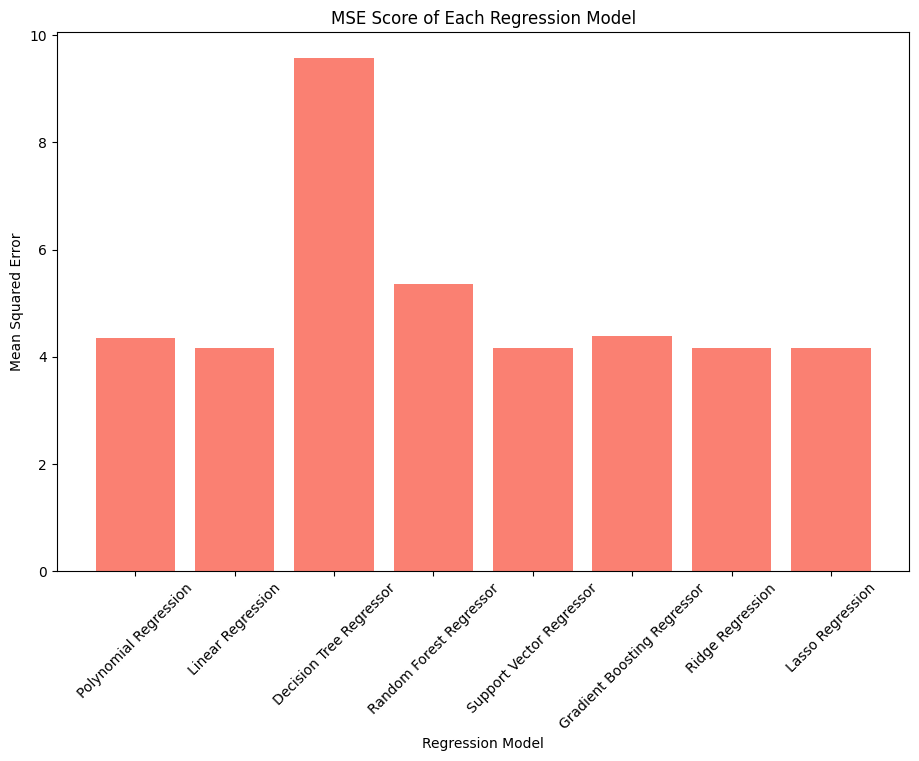

In [150]:
plt.figure(figsize=(11, 7))
plt.bar(model1, mse, color='salmon')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('MSE Score of Each Regression Model')
plt.xticks(rotation=45)
plt.show() 

Μπορούμε να παρατηρήσουμε πως το καλύτερο μοντέλο με βάση το Mean Squared Error(MSE) είναι το Lasso Regression με τις παραμέτρους alpha=0.0001, max_iter=500, tol=0.1 . Επομένες έχουμε τα παρακάτω.

In [151]:
i = mse.index(min(mse))

In [152]:
y_pred_best= y_pred[i]
mse_best = mse[i]
param_best = best_param[i]
X_test_best = X_test_models[i]
X_train_best = X_train_models[i]
model_best = best_estimator[i]
print(model1[i])
print(model_best)
print(param_best)

Lasso Regression
Lasso(alpha=0.0001, max_iter=500, tol=0.1)
{'alpha': 0.0001, 'max_iter': 500, 'tol': 0.1}


In [153]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error: ", mse_best)
print("R2 Score: ", r2_score(y_test, y_pred_best))

Mean Squared Error:  4.154936331635704
R2 Score:  0.7326179653802718


Σύνοψη: Δημιουργήσαμε ένα μοντέλο παλινδρόμισης για την πρόβλεψη των βαθμών των φοιτητών σε σχέση με διάφορους παράγοντες όπως η πρόσβαση στο διαδίκτυο, το πόσες ώρες κοιμούντε, το πόσες ώρες διαβάζουν κ.ο.κ.

Με βάση την ανάλυση που κάναμε παραπάνω προέκυψε πως το καλύτερο μοντέλο απο αυτά που εξετάσαμε είναι το Lasso Regression όπου βρήκαμε βέλτιστες παραμέτρους τις alpha=0.0001, max_iter=500, tol=0.1

Τα features τα οποία με βάση την ανάλυση που κάναμε βγήκαν ώς σημαντικά είναι τα 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Hours_Studied','Parental_Involvement', 'Access_to_Resources', 'Motivation_Level','Family_Income', 'Teacher_Quality', 'Parental_Education_Level','Distance_from_Home', 'Physical_Activity','Extracurricular_Activities_No', 'Extracurricular_Activities_Yes',
'Internet_Access_No', 'Peer_Influence_Negative','Peer_Influence_Neutral', 'Peer_Influence_Positive','Learning_Disabilities_No'.

Το R^2 ισούται με 0.733 επομένως το μοντέλο μας εξηγά το 73.3% της μεταβλητότητας του exam scores μέσω των επιλεγμένων features. Το RMSE=sqrt(MSE) ισούται με 2.038 επομένως αυτό σημαίνει πως κατά μέσο όρο η πρόβλεψη μας για κάθε βαθμό εξέτασης διαφέρει κατά 2.038 μονάδες απο την πραγματική τιμή.

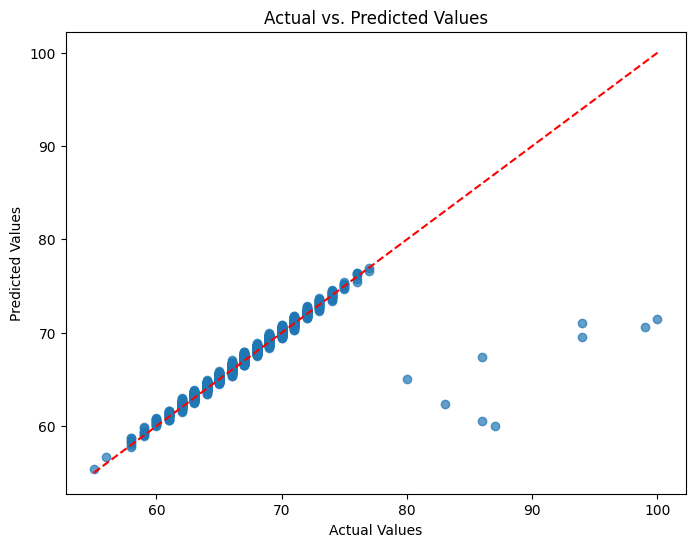

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


Μπορούμε να παρατηρήοσυμε πως το μοντέλο μας με βάση την γραφική υπολογίζει σε πολύ ικανοποιητικό βαθμό τον βαθμό του μαθητή για τιμές μικρότερες του 80. Για τιμές μεγαλύτερες απο 80 δεν μπορούμε να πούμε το ίδιο. Αυτό μπορεί να οφείλετε στο ότι όπως μπορούμε να παρατηρήοσυμε και παρακάτω δεν υπάρχουν αρκετοί μαθητές οι οποίοι πήραν βαθμό μεγαλύτερο απο 80 στο training set, επομένως το μοντέλο μηχανικής μάθησης που δημιουργήσαμε δεν έχει αρκετά δεδομένα για να προβλέψει ικανοποιητικά τον τελικό βαθμό του μαθητή. Επίσης λόγω της μεγάλης διαφοράς δεδομένων στο training set για βαθμούς μικρότερους απο 80 σε σχέση με μεγαλύτερους, μπορεί να οδήγησε το μοντέλο μας σε προσαρμογή στα δεδομένα μικρότερα απο 80(biased ώς πρός αυτά τα δεδομένα) αφού στην τελική θα οδηγούσε σε μικρότερο ολικό σφάλμα σε αντίθεση με το να το έκανε generalize και για τις τιμές μεγαλύτερες απο 80.

In [157]:
count = 0
for i in y_train.values:
    if i > 80:
        count+=1

print(count)

35


Επειδή έχουμε Lasso Regression, μπορούμε να υπολογίσουμε τα βάρη για κάθε feature όπως και την σταθερά της παλινδρόμισης.

In [163]:
coefficients = model_best.coef_

In [168]:
intercept = model_best.intercept_

In [169]:
df = pd.DataFrame(coefficients, index=X_train_best.columns, columns=["Coefficients"])
print(df)
print()
print("Intercept: ", intercept)

                                Coefficients
Attendance                      7.945534e+00
Previous_Scores                 2.432289e+00
Tutoring_Sessions               4.838539e-01
Hours_Studied                   1.769307e+00
Parental_Involvement            1.006635e+00
Access_to_Resources             1.021990e+00
Motivation_Level                5.513339e-01
Family_Income                   5.666131e-01
Teacher_Quality                 5.520568e-01
Parental_Education_Level        4.946623e-01
Distance_from_Home             -4.593309e-01
Physical_Activity               1.992808e-01
Extracurricular_Activities_No  -5.626076e-01
Extracurricular_Activities_Yes  1.337722e-16
Internet_Access_No             -8.974091e-01
Peer_Influence_Negative        -8.970209e-01
Peer_Influence_Neutral         -3.381165e-01
Peer_Influence_Positive         1.176801e-01
Learning_Disabilities_No        8.672434e-01

Intercept:  57.07844535052128


Η εξήγηση των βαρών για κάθε χαρακτηριστικό το οποίο παίρνει αριθμητικές τιμές θέλει προσοχή. Αυτό οφείλετε στο ότι τα βάρη που υπολογίσαμε δείχνουν την μεταβολή του Exam Score όχι για τις μεταβλητές Attendance, Previous_Scores , Tutoring_Sessions, Hours_Studied αλλά για τις κλιμακωμένες τιμές τους. Για να βρούμε την πραγματική τους σχέση θα κινηθούμε ώς ακολούθως:

Στην μεταβλητή Attendance κάναμε MinMax Scaler επομένως η σχέση για κάθε τιμή του x ήταν η ακόλουθη: d = (x-Attendance.min)/(Attendance.max-Attendance.min)
Επομένως η μεταβολή κατά μιας μονάδας του d μεταβάλλει κατά coeffiecent_Attendance = 7.945534 μονάδες το Exam_Score. Μεταβάλλοντας κατά μια μονάδα το x έχουμε 7.945534*(x+1-Attendance.min)/(Attendance.max-Attendance.min) =7.945534*(x-Attendance.min)/(Attendance.max-Attendance.min) + 7.945534/(Attendance.max-Attendance.min) = d +  7.945534/(Attendance.max-Attendance.min). Μπορούμε να παρατηρήσουμε πως η μεταβολή κατά μια μονάδα του Attendance μεταβάλλει το Exam_Score κατά  7.945534/(Attendance.max-Attendance.min) μονάδες.

Γνωρίζουμε πως κλιμακώσαμε το Previous_Scores με MinMax Scaler και  coeffiecent_Previous_Scores= 7.945534=2.432289 επομένως έχουμε αντίστοιχα πως η μεταβολή κατά μια μονάδα του Previous_Scores μεταβάλλει το Exam_Score κατά   2.432289/(Previous_Scores.max-Previous_Scores.min) μονάδες.

To Hours_Studied είναι κλιμακωμένο μέσω του Standard Scaler άρα έχουμε: (x-mean(Hours_Studied))/std(Hours_Studied). Επίσης ισχύει πως  coefficient_Hours_Studied = 1.769307. H μεταβολή κατά μια μονάδα του Hours_Studied μεταβάλλει το Exam_Score κατά   1.769307/std(Hours_Studied) μονάδες.

Το Tutoring_Sessions είναι κλιμακωμένο μέσω του Robust Scaler άρα έχουμε: (x-median(Tutoring_Sessions))/IQR(Tutoring_Sessions). Επίσης ισχύει πως coefficient_Tutoring_Sessions = 4.838539e-01. H μεταβολή κατά μια μονάδα του Hours_Studied μεταβάλλει το Exam_Score κατά 4.838539e-01/IQR(Tutoring_Sessions)  μονάδες.

Παρακάτω παρουσιάζουμε τις αντίστοιχες γραφικές.

Text(0.5, 1.0, 'Hours Studied')

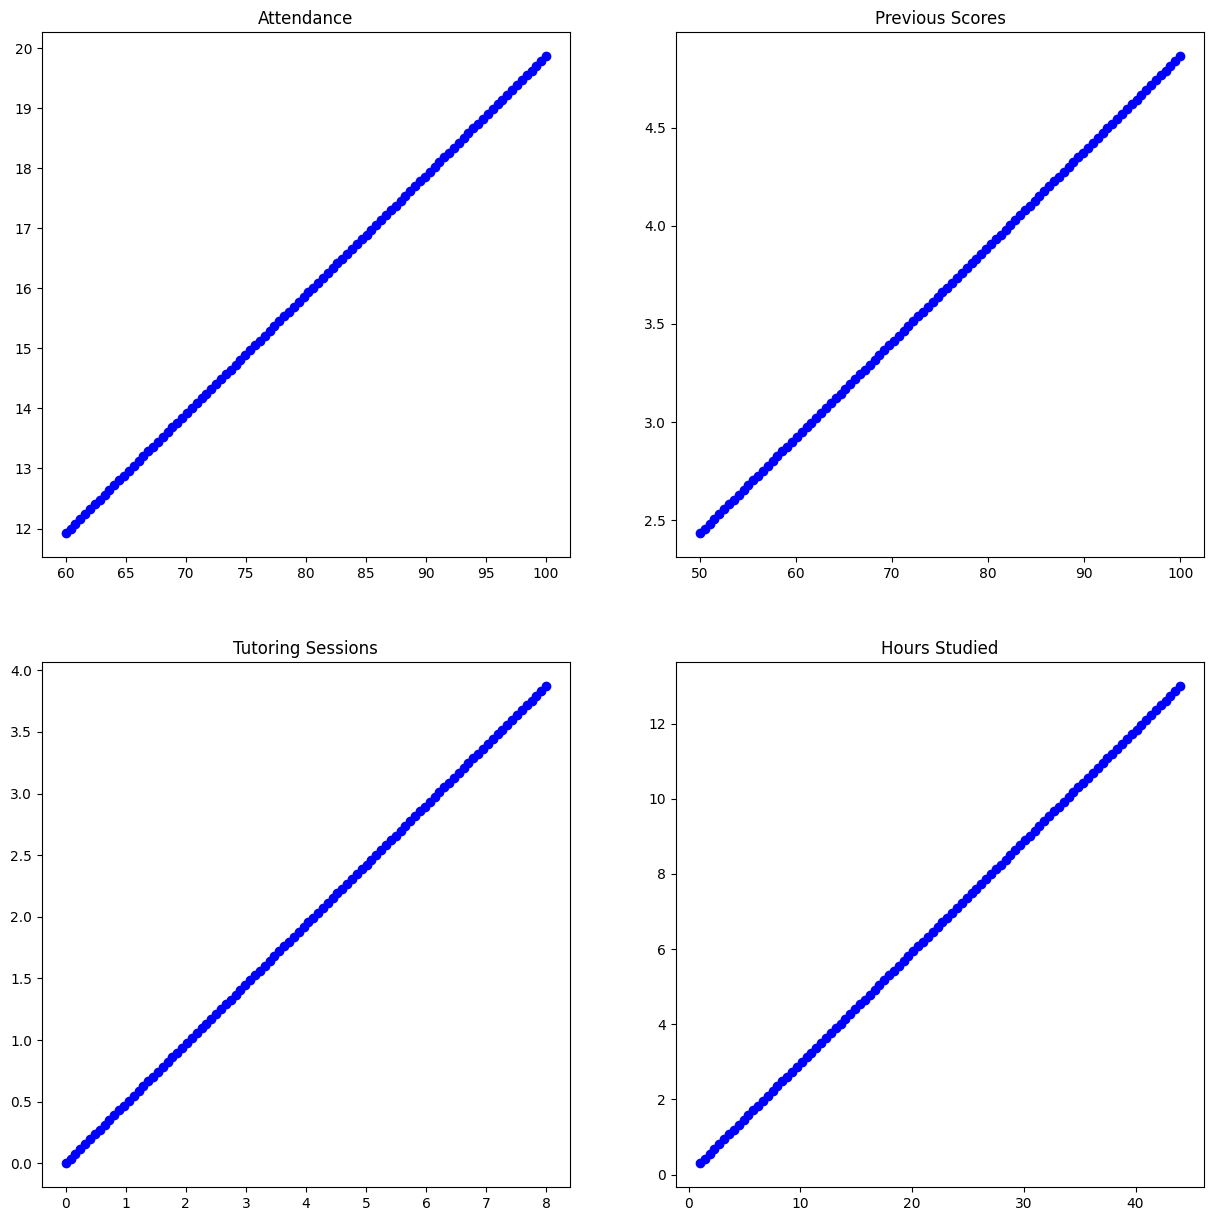

In [191]:
def linear_function(p,x):
    m = p
    b = intercept

    return m * x + b

data1 = pd.read_csv('./StudentPerformanceFactors.csv')

x = []

x.append(np.linspace(data1["Attendance"].min(),data1["Attendance"].max(),num = 100))
x.append(np.linspace(data1["Previous_Scores"].min(),data1["Previous_Scores"].max(),num = 100))
x.append(np.linspace(data1["Tutoring_Sessions"].min(),data1["Tutoring_Sessions"].max(),num = 100))
x.append(np.linspace(data1["Hours_Studied"].min(),data1["Hours_Studied"].max(),num = 100))

coefficient_Attendance = 7.945534/(data1["Attendance"].max()-data1["Attendance"].min())
coefficient_Previous_Scores = 2.432289/(data1["Previous_Scores"].max()-data1["Previous_Scores"].min()) 
coefficient_Hours_Studied = 1.769307/np.std(data1["Hours_Studied"])  
coefficient_Tutoring_Sessions = 4.838539e-01/(np.percentile(data1["Tutoring_Sessions"], 75) - np.percentile(data1["Tutoring_Sessions"], 25))

fig, ax = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
ax[0,0].scatter(x[0],coefficient_Attendance*x[0],color='blue')
ax[0,0].set_title("Attendance")
ax[0,1].scatter(x[1],coefficient_Previous_Scores*x[1],color='blue')
ax[0,1].set_title("Previous Scores")
ax[1,0].scatter(x[2],coefficient_Tutoring_Sessions*x[2],color='blue')
ax[1,0].set_title("Tutoring Sessions")
ax[1,1].scatter(x[3],coefficient_Hours_Studied*x[3],color='blue')
ax[1,1].set_title("Hours Studied")